1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
Feature map shape: (1, 7, 7, 512)


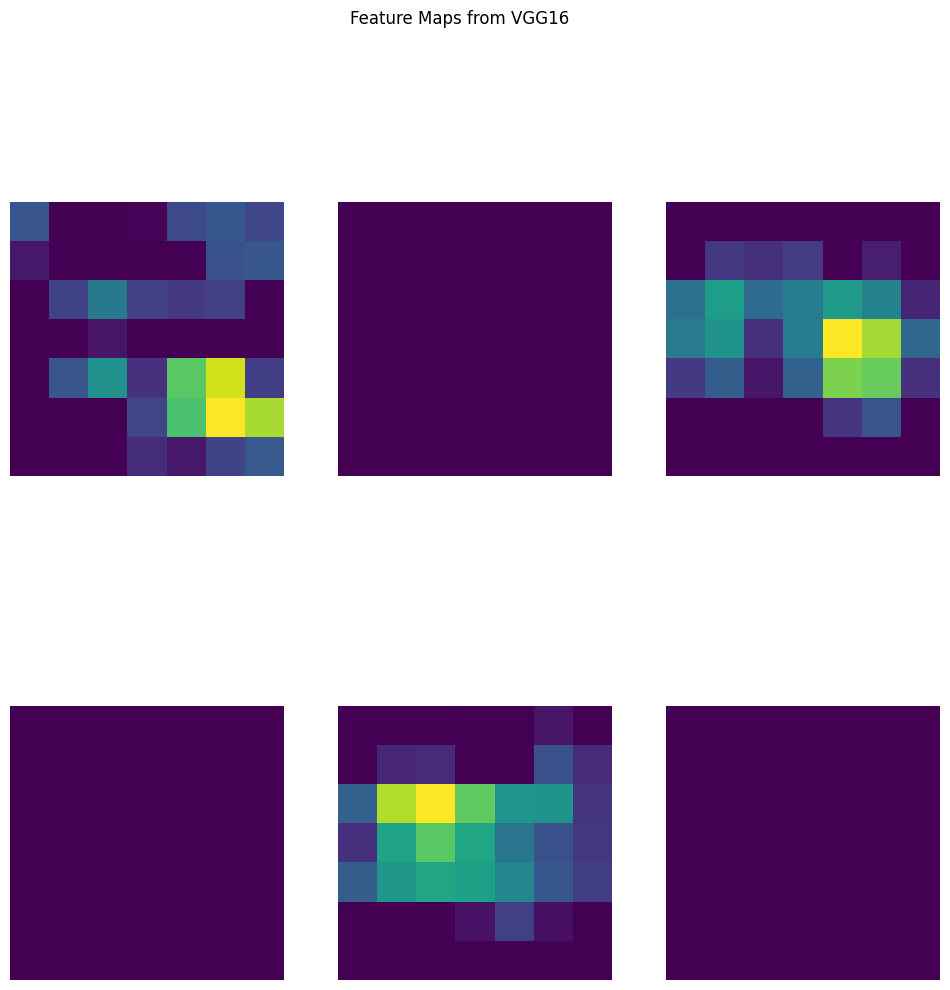

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Load VGG16 model pre-trained on ImageNet without the top layer
base_model = VGG16(weights='imagenet', include_top=False)

# Function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Scale to [0, 1]
    return img_array

# Function to extract features
def extract_features(img_path):
    img_array = preprocess_image(img_path)
    features = base_model.predict(img_array)
    return features

# Load and preprocess an image
img_path = '6.jpg'  # Replace with your image path
features = extract_features(img_path)

# Print the shape of the feature map
print("Feature map shape:", features.shape)

# Visualize the feature map
num_feature_maps = features.shape[-1]
plt.figure(figsize=(12, 12))
for i in range(min(6, num_feature_maps)):  # Display first 6 feature maps
    plt.subplot(2, 3, i + 1)
    plt.imshow(features[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Feature Maps from VGG16')
plt.show()
